In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5, style='ticks')
import warnings
warnings.filterwarnings('ignore')
from spike2calcium_sigmoid_ALS import *

## Figure A

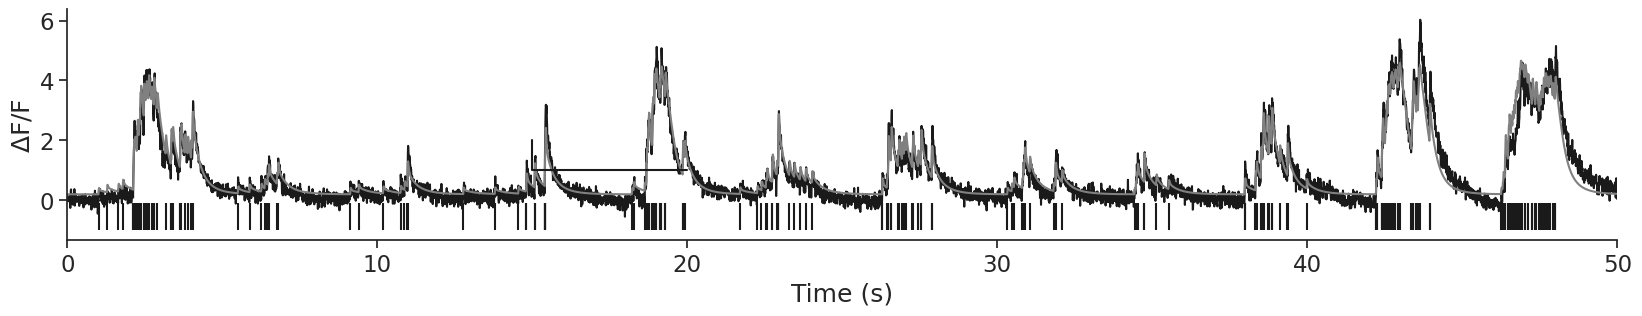

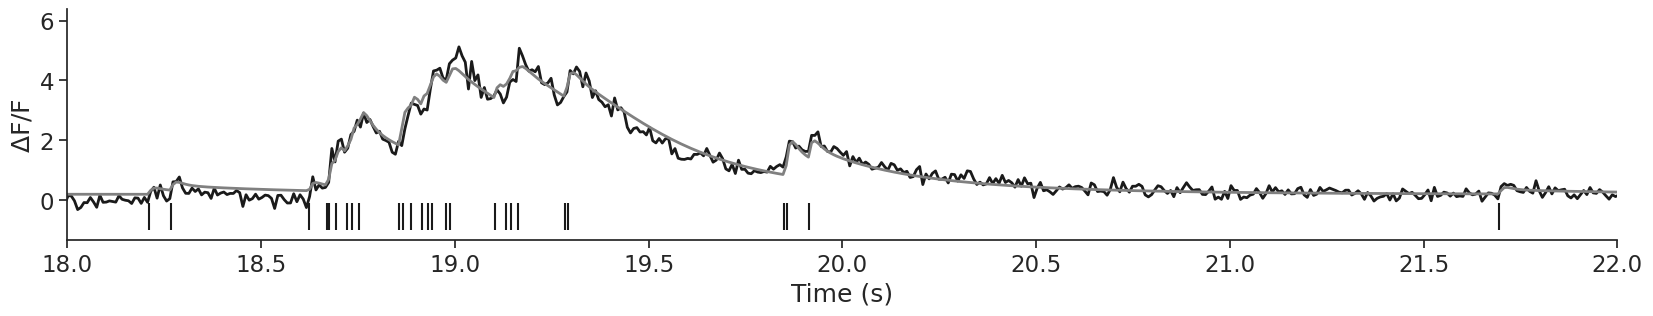

In [2]:
nf = 'sensor_456_subject_478349_cell_9'
f_dff = f'GCaMP8_exported_ROIs_s2f_full/dff_v03/{nf}.npz'
_ = np.load(f_dff, allow_pickle=True)
spike_times = _['spike_times'] # raw fluorescence of the ROI
ca_times = _['ca_times'] # raw fluorescence of the surrounding neuropil, for neuropil subtraction
ca_trace = _['ca_trace'] # frame rate of the movie
cell_type = _['cell_type'] # timing of the action potentials from ephys
spike_times = [_ for _ in spike_times]
ca_times = [_ for _ in ca_times]
ca_trace =[_ for _ in ca_trace]

f_fit = f'GCaMP8_exported_ROIs_s2f_full/fit_als_sigmoid_results_v01/{nf}_fit.npz'
_=np.load(f_fit, allow_pickle=True)
param_kernel = _['param_kernel']
param_model = _['param_model']
n_dat = 1
dff_ = ca_trace[n_dat]
ca_est = spike2calcium(spike_times[n_dat], ca_times[n_dat], param_kernel)
ca_est = sigmoid(ca_est, *param_model[n_dat])
ev = ev_s2f(ca_est, dff_)

plt.figure(figsize=(20, 3))
plt.plot(ca_times[n_dat], ca_trace[n_dat], 'k')
plt.plot(ca_times[n_dat], ca_est, c='gray')
plt.vlines(spike_times[n_dat], ymin=-1, ymax=-0.1, colors='k')
plt.plot([15, 15, 20], [2, 1, 1], '-k')
plt.xlim([0, 50])
plt.ylabel('$\Delta$F/F')
plt.xlabel('Time (s)')
sns.despine()
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(ca_times[n_dat], ca_trace[n_dat], 'k', lw=2)
plt.plot(ca_times[n_dat], ca_est, c='gray', lw=2)
plt.vlines(spike_times[n_dat], ymin=-1, ymax=-0.1, colors='k')
plt.xlim([18, 22])
plt.ylabel('$\Delta$F/F')
plt.xlabel('Time (s)')
sns.despine()
plt.show()

## Figure D; top

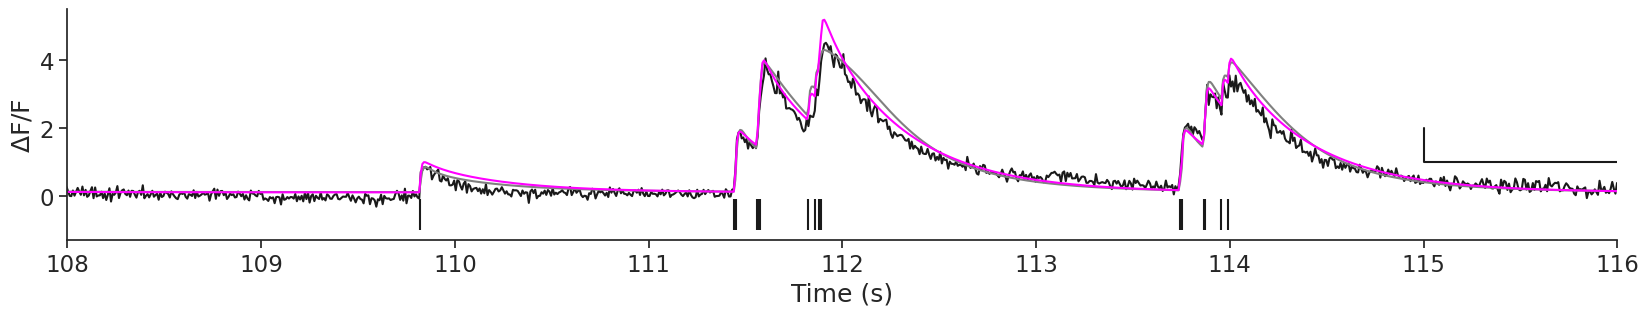

In [3]:
nf = 'sensor_688_subject_479116_cell_4'
f_dff = f'GCaMP8_exported_ROIs_s2f_full/dff_v03/{nf}.npz'
_ = np.load(f_dff, allow_pickle=True)
spike_times = _['spike_times'] # raw fluorescence of the ROI
ca_times = _['ca_times'] # raw fluorescence of the surrounding neuropil, for neuropil subtraction
ca_trace = _['ca_trace'] # frame rate of the movie
cell_type = _['cell_type'] # timing of the action potentials from ephys
spike_times = [_ for _ in spike_times]
ca_times = [_ for _ in ca_times]
ca_trace =[_ for _ in ca_trace]

f_fit = f'GCaMP8_exported_ROIs_s2f_full/fit_als_sigmoid_results_v02/{nf}_fit.npz'
_=np.load(f_fit, allow_pickle=True)
param_kernel = _['param_kernel']
param_model = _['param_model']
n_dat = 1
dff_ = ca_trace[n_dat]
ca_est = spike2calcium(spike_times[n_dat], ca_times[n_dat], param_kernel)
ca_est_sigmoid = sigmoid(ca_est, *param_model[n_dat])

f_fit = f'GCaMP8_exported_ROIs_s2f_full/fit_als_linear_results_v06/{nf}_fit.npz'
_=np.load(f_fit, allow_pickle=True)
param_kernel = _['param_kernel']
param_linear = _['param_linear']
dff_ = ca_trace[n_dat]
ca_est = spike2calcium(spike_times[n_dat], ca_times[n_dat], param_kernel)
ca_est_linear = linear_(ca_est, param_linear[n_dat])

plt.figure(figsize=(20, 3))
plt.plot(ca_times[n_dat], ca_trace[n_dat], c='k')
plt.plot(ca_times[n_dat], ca_est_sigmoid, c='gray')
plt.plot(ca_times[n_dat], ca_est_linear, c='magenta')
plt.vlines(spike_times[n_dat], ymin=-1, ymax=-0.1, colors='k')
plt.plot([115, 115, 116], [2, 1, 1], '-k')
plt.xlim([108, 116])
plt.ylabel('$\Delta$F/F')
plt.xlabel('Time (s)')
sns.despine()
plt.show()

## Figure D; middle

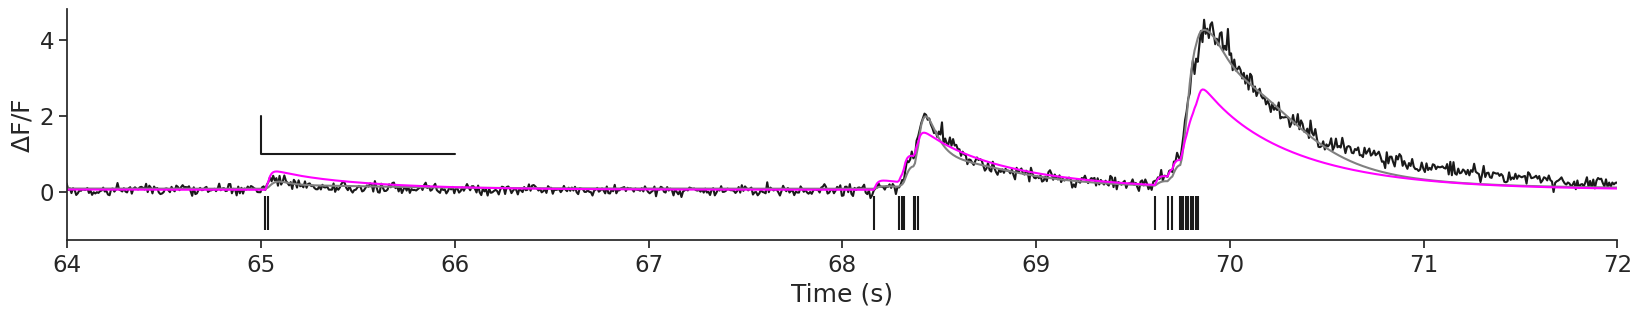

In [4]:
nf = 'sensor_GCaMP7F_subject_478404_cell_3'
f_dff = f'GCaMP8_exported_ROIs_s2f_full/dff_v03/{nf}.npz'
_ = np.load(f_dff, allow_pickle=True)
spike_times = _['spike_times'] # raw fluorescence of the ROI
ca_times = _['ca_times'] # raw fluorescence of the surrounding neuropil, for neuropil subtraction
ca_trace = _['ca_trace'] # frame rate of the movie
cell_type = _['cell_type'] # timing of the action potentials from ephys
spike_times = [_ for _ in spike_times]
ca_times = [_ for _ in ca_times]
ca_trace =[_ for _ in ca_trace]

f_fit = f'GCaMP8_exported_ROIs_s2f_full/fit_als_sigmoid_results_v02/{nf}_fit.npz'
_=np.load(f_fit, allow_pickle=True)
param_kernel = _['param_kernel']
param_model = _['param_model']
n_dat = 0
dff_ = ca_trace[n_dat]
ca_est = spike2calcium(spike_times[n_dat], ca_times[n_dat], param_kernel)
ca_est_sigmoid = sigmoid(ca_est, *param_model[n_dat])

f_fit = f'GCaMP8_exported_ROIs_s2f_full/fit_als_linear_results_v06/{nf}_fit.npz'
_=np.load(f_fit, allow_pickle=True)
param_kernel = _['param_kernel']
param_linear = _['param_linear']
dff_ = ca_trace[n_dat]
ca_est = spike2calcium(spike_times[n_dat], ca_times[n_dat], param_kernel)
ca_est_linear = linear_(ca_est, param_linear[n_dat])


plt.figure(figsize=(20, 3))
plt.plot(ca_times[n_dat], ca_trace[n_dat], c='k')
plt.plot(ca_times[n_dat], ca_est_sigmoid, c='gray')
plt.plot(ca_times[n_dat], ca_est_linear, c='magenta')
plt.vlines(spike_times[n_dat], ymin=-1, ymax=-0.1, colors='k')
plt.plot([65, 65, 66], [2, 1, 1], '-k')
plt.xlim([64, 72])
plt.ylabel('$\Delta$F/F')
plt.xlabel('Time (s)')
sns.despine()
plt.show()

## Figure D; bottom

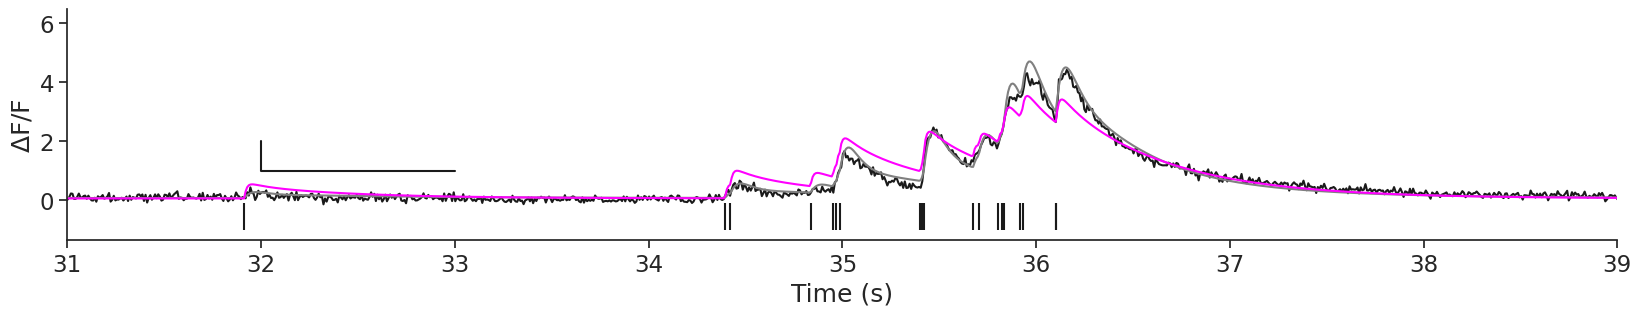

In [5]:
nf = 'sensor_GCaMP7F_subject_471991_cell_6'
f_dff = f'GCaMP8_exported_ROIs_s2f_full/dff_v03/{nf}.npz'
_ = np.load(f_dff, allow_pickle=True)
spike_times = _['spike_times'] # raw fluorescence of the ROI
ca_times = _['ca_times'] # raw fluorescence of the surrounding neuropil, for neuropil subtraction
ca_trace = _['ca_trace'] # frame rate of the movie
cell_type = _['cell_type'] # timing of the action potentials from ephys
spike_times = [_ for _ in spike_times]
ca_times = [_ for _ in ca_times]
ca_trace =[_ for _ in ca_trace]

f_fit = f'GCaMP8_exported_ROIs_s2f_full/fit_als_sigmoid_results_v02/{nf}_fit.npz'
_=np.load(f_fit, allow_pickle=True)
param_kernel = _['param_kernel']
param_model = _['param_model']
n_dat = 0
dff_ = ca_trace[n_dat]
ca_est = spike2calcium(spike_times[n_dat], ca_times[n_dat], param_kernel)
ca_est_sigmoid = sigmoid(ca_est, *param_model[n_dat])

f_fit = f'GCaMP8_exported_ROIs_s2f_full/fit_als_linear_results_v06/{nf}_fit.npz'
_=np.load(f_fit, allow_pickle=True)
param_kernel = _['param_kernel']
param_linear = _['param_linear']
dff_ = ca_trace[n_dat]
ca_est = spike2calcium(spike_times[n_dat], ca_times[n_dat], param_kernel)
ca_est_linear = linear_(ca_est, param_linear[n_dat])


plt.figure(figsize=(20, 3))
plt.plot(ca_times[n_dat], ca_trace[n_dat], c='k')
plt.plot(ca_times[n_dat], ca_est_sigmoid, c='gray')
plt.plot(ca_times[n_dat], ca_est_linear, c='magenta')
plt.vlines(spike_times[n_dat], ymin=-1, ymax=-0.1, colors='k')
plt.plot([32, 32, 33], [2, 1, 1], '-k')
plt.xlim([31, 39])
plt.ylabel('$\Delta$F/F')
plt.xlabel('Time (s)')
sns.despine()
plt.show()